/Users/oliviawren/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


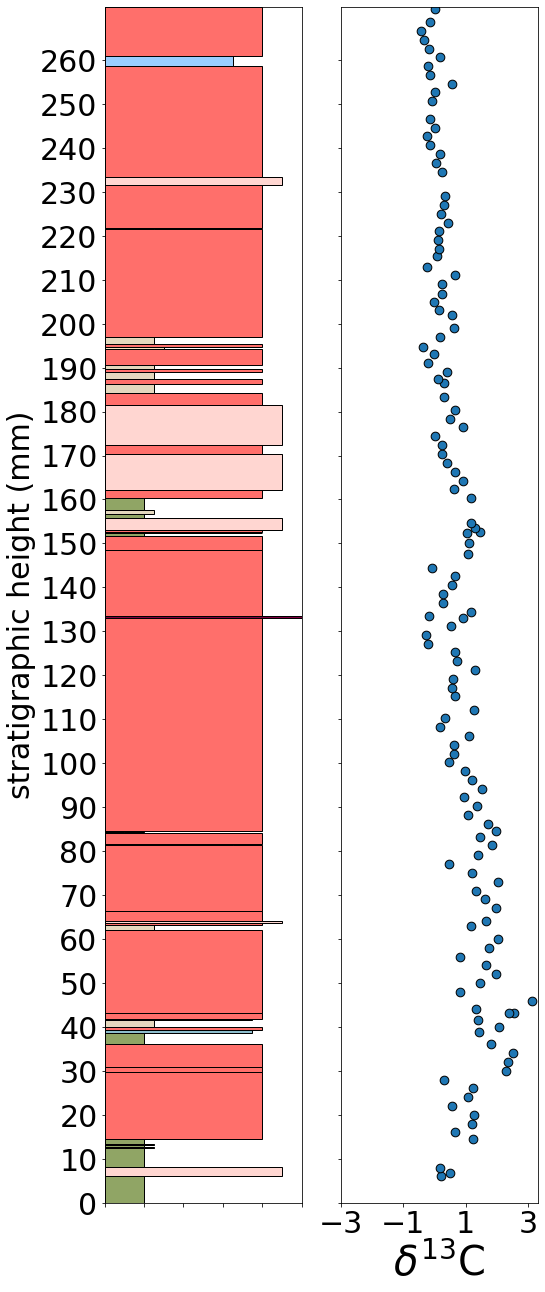

In [19]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import pandas as pd

tmp=pd.read_table('https://mrdata.usgs.gov/catalog/lithrgb.txt',sep='\t')
usgs_liths=dict()
for i,lith in tmp.iterrows():
    usgs_liths[lith['text'].lower()]='#{:02x}{:02x}{:02x}'.format( lith['r'], lith['g'] , lith['b'] )

cnames=colors.cnames
#MAGIC! 
def getKey(item):
    return item[1]
    
#MAKE A STRATIGRAPHIC LITHOLOGY KEY
def stratkey(ax, strat_style):
    
    boxes=[]
    for k in strat_style.keys():
        boxes.append(strat_style[k])
    
    boxes=list(set(boxes))
    boxes=sorted(boxes,key=getKey)
    
    h=1/float(len(boxes))
    stack=0
    for b in boxes:
        rect = patches.Rectangle((0, stack),  b[1], h,
          facecolor=b[0],edgecolor="k")
        stack=stack+h
        ax.add_patch(rect)
        label=','.join([k for k in strat_style if strat_style[k]==b])
        ax.text(1.3,stack-h/2,label,transform=ax.transAxes,horizontalalignment='right',verticalalignment='center')
    
    ax.text(0.5,1.05,'lithostratigraphic key',transform=ax.transAxes,fontweight='bold',horizontalalignment='center')
    ax.axis('off')
    ##MAKE SIMPLE STRATIGRAPHIC COLUMNS 
def pystrat(ax,strat,style,jitter,draw_trace):
    strat=strat[np.isnan(strat['thickness'])==False]
    stack=0
    stack_max=sum(strat['thickness'])
    
    ax.axis([0, 1, 0,stack_max])
    
    trace=[]
    for i,s in strat.iterrows():
        
        if s['facies'] in style.keys():
            w=style[s['facies']][1]
            c=style[s['facies']][0]
        else:
            w=1
            c='black'
            
        jitter_y=[]
        jitter_x=[]
        
        if w!=0:
            jitter_y=np.arange(stack+jitter['y']/2,stack+s['thickness'],jitter['y'])
            jitter_w=np.linspace(w-jitter['spread'],w+jitter['spread'],len(jitter_y)+2)
            jitter_x=np.random.uniform(-1*jitter['x'],jitter['x'],len(jitter_y))+jitter_w[1:-1]
            
        if len(jitter_y)==0:
            w_box=[w,w]
        else:
            w_box=[w-jitter['spread'],w+jitter['spread']]
            
        xy=np.array([(0,stack),
                     (w_box[0],stack)]
                     +list(zip(jitter_x,jitter_y))
                     +[(w_box[1],stack+s['thickness']),
                     (0,stack+s['thickness'])])
    
        rect = Polygon(xy,closed=True,
                          facecolor=c,edgecolor="k")
        
        ax.add_patch(rect)
        
        trace.extend([(w_box[0],stack)]
                     +list(zip(jitter_x,jitter_y))
                     +[(w_box[1],stack+s['thickness'])])
    
        stack=stack+s['thickness']
        
    ax.plot([0,0],[0,stack_max],lw=1,color='k')
    ax.plot([0,1],[0,0],lw=1,color='k')
    
    if draw_trace['on']:
        ax.plot([t[0] for t in trace],[t[1] for t in trace],'k-',lw=draw_trace['lw'])
    ax.axis('on')
#%% STRATIGRAPHIC PLOT OF DATA
fig=plt.figure(3,figsize=(12,22))
ax = fig.add_subplot(131,)
axb = fig.add_subplot(132)
# axc = fig.add_subplot(133)
strat=pd.read_excel('ALL_FW_DATA.xlsx',sheet_name='FW2')
strat_style={'siltstone': (usgs_liths['medium-grained mixed clastic rock'], 0.2),
             'fine sandstone': (usgs_liths['beach sand'], 0.25),
             'medium sandstone': (usgs_liths['loess'], 0.3),
             'coarse sandstone': (usgs_liths['sand sheet'], 0.4),
             'cover': (cnames['white'], 0),
             'dolostone': (usgs_liths['calcarenite'], 0.65),
             'grainstone': (usgs_liths['olistostrome'], 0.75),
             'wackestone': (usgs_liths['wacke'], 0.7),
             'mudstone': (usgs_liths['bentonite'], 0.1),
             'stromatolite': (usgs_liths['norite'], 0.9),
             'limestone': (cnames['lightsteelblue'], 0.55),
             'oncolite': (usgs_liths['subaluminous granite'], 0.8),
             'oncolitic dolostone': (usgs_liths['iron formation'],0.65),
            'intraclast breccia': (usgs_liths['coal'], 1),
            'very fine sandstone': (usgs_liths['delta'], 0.2)}
pystrat(ax,strat,strat_style,
        jitter={'y':1, 'x': 0,'spread':0},
        draw_trace={'on':False,'lw':1})
ax.set_ylabel('stratigraphic height (mm)',fontsize=30)
axb.scatter(x=strat['d13c_carb'],y=strat['sample_height'],edgecolor='k',s=75)
# axc.scatter(x=strat['d18o_carb'],y=strat['sample_height'],edgecolor='k',s=75)
#axc.scatter... #oxygen
axb.set_xlabel('$\delta^{13}$C',fontsize=40)
# axc.set_xlabel('$\delta^{18}$O',fontsize=40)

ax.set_yticks(np.arange(0,270,10))
ax.tick_params(axis='y', labelsize=30 )
axb.set_yticks(np.arange(0,270,10))
axb.tick_params(axis='x', labelsize=30 )
# axc.tick_params(axis='x', labelsize=30 )


axb.set_yticks(np.arange(0,270,10))
axb.set_yticklabels([])
# axc.set_yticks(np.arange(0,270,10))
# axc.set_yticklabels([])
ax.set_xticklabels([])

# axc.set_xticks(np.arange(-10,1,3))
axb.set_xticks(np.arange(-3,4,2))

ax.set_ylim(0,272.1)
axb.set_ylim(0,272.1)
# axc.set_ylim(0,275)

plt.savefig('FW2.pdf')

#need to look at field notes... may have made an adding mistake when labeling samples?


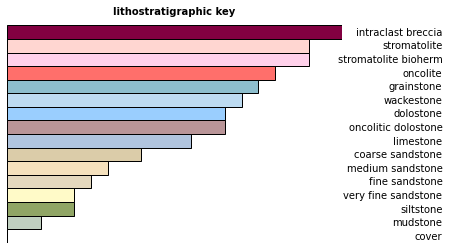

In [3]:
fig,ax = plt.subplots(1,1)
stratkey(ax,strat_style)
plt.savefig('lithokey.pdf')

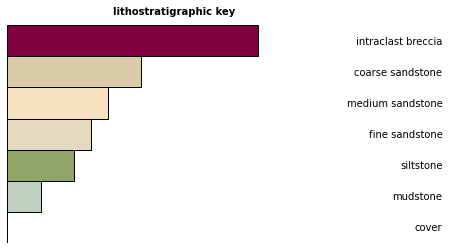

In [17]:
strat_style={'siltstone': (usgs_liths['medium-grained mixed clastic rock'], 0.2),
             'fine sandstone': (usgs_liths['beach sand'], 0.25),
             'medium sandstone': (usgs_liths['loess'], 0.3),
             'coarse sandstone': (usgs_liths['sand sheet'], 0.4),
             'cover': (cnames['white'], 0),
             'mudstone': (usgs_liths['bentonite'], 0.1),
            'intraclast breccia': (usgs_liths['coal'], .75)}
fig,ax = plt.subplots(1,1)
stratkey(ax,strat_style)
plt.savefig('FW1-2_key_silici.pdf')

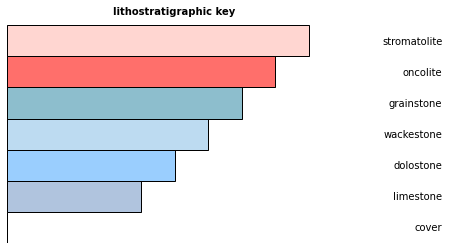

In [16]:
strat_style={'dolostone': (usgs_liths['calcarenite'], 0.5),
             'grainstone': (usgs_liths['olistostrome'], 0.7),
             'wackestone': (usgs_liths['wacke'], 0.6),
             'stromatolite': (usgs_liths['norite'], .9),
             'limestone': (cnames['lightsteelblue'], 0.4),
             'oncolite': (usgs_liths['subaluminous granite'], 0.8),
            'cover': (cnames['white'], 0)}
fig,ax = plt.subplots(1,1)
stratkey(ax,strat_style)
plt.savefig('FW1-2_key_carb.pdf')

Text(0.5, 1.0, 'FW2')

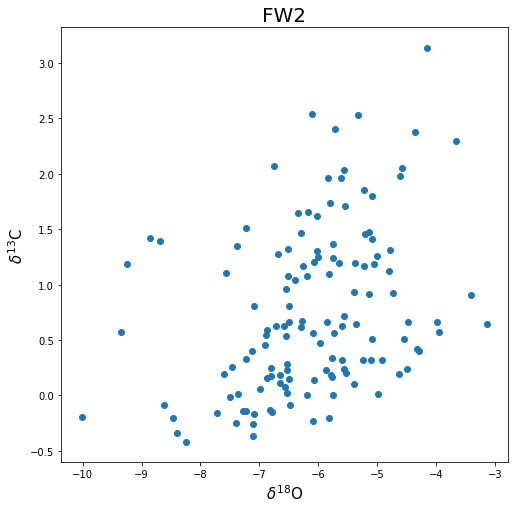

In [4]:
#carbon oxygen crossplot
x=strat['d18o_carb']
y=strat['d13c_carb']
plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.xlabel('$\delta^{18}$O',fontsize=15)
plt.ylabel('$\delta^{13}$C',fontsize=15)
plt.title('FW2',fontsize=20)

In [5]:
'siltstone': (usgs_liths['medium-grained mixed clastic rock'], 0.1),
'mudstone': (usgs_liths['bentonite'], 0.05),
'very fine sandstone': (usgs_liths['delta'], 0.2),
'fine sandstone': (usgs_liths['beach sand'], 0.3),
'medium sandstone': (usgs_liths['loess'], 0.3),
'coarse sandstone': (usgs_liths['sand sheet'], 0.4),
'very coarse sandstone': (usgs_liths['mass wasting material'], 0.5),
'breccia': (usgs_liths['coal'], 1),
'quartzite': (usgs_liths['meta-argillite'], 0.8),
'pebbly siltstone': (usgs_liths['glacial drift'], 0.15),
'oncolite': (usgs_liths['subaluminous granite'], 0.8),
'stromatolite': (usgs_liths['norite'], 0.9),
'dolostone': (usgs_liths['dolostone'], 0.65),
'grainstone': (usgs_liths['olistostrome'], 0.75),
'wackestone': (usgs_liths['wacke'], 0.75),
'coarse sandy dolostone': (usgs_liths['mixed carbonate/clastic rock'], 0.8),
'fine sandy dolostone': (usgs_liths['mixed volcanic/clastic rock'], 0.6),
'wackestone': (usgs_liths['wacke'], 0.7),

SyntaxError: invalid syntax (<ipython-input-5-79d0da67fcad>, line 1)

In [ ]:
strat_style={'siltstone': (usgs_liths['Siltstone'], 0.1),
             'fine sandstone': (usgs_liths['Beach sand'], 0.3),
             'mudstone': (usgs_liths['192	Bentonite'], 0.05),
             'grainstone': (usgs_liths['Olistostrome'], 0.75),
             'oncolite': (usgs_liths['Quartz monzogabbro'], 0.8),
             'stromatolite': (usgs_liths['Quartz monzonite'], 0.9),
             'breccia': (usgs_liths['Coal'], 1),
            'very fine sandstone': (usgs_liths['Delta'], 0.2)}

In [ ]:
#carbon oxygen crossplot
data = pd.read_csv('C_O_data.csv')
x=data['d18o_1']
y=data['d13c_1']
x2=data['d18o_2']
y2=data['d13c_2']
x3=data['d18o_3']
y3=data['d13c_3']
x4=data['d18o_4']
y4=data['d13c_4']
x5=data['d18o_5']
y5=data['d13c_5']
x6=data['d18o_6']
y6=data['d13c_6']
x7=data['d18o_7']
y7=data['d13c_7']

plt.figure(figsize=(8,8))
plt.scatter(x,y,label='FW1')
plt.scatter(x2,y2,label='FW2')
plt.scatter(x3,y3,label='FW3')
plt.scatter(x4,y4,label='FW4')
plt.scatter(x5,y5,label='FW5')
plt.scatter(x6,y6,label='FW6')
plt.scatter(x7,y7,label='FW7')

plt.xlabel('$\delta^{18}$O',fontsize=15)
plt.ylabel('$\delta^{13}$C',fontsize=15)
plt.title('All data',fontsize=20)
plt.legend(loc='best',fontsize='xx-large',frameon=False)
plt.ylim(-5,5)

plt.savefig('C_O_data.png')